# Satellite Imagery Classification

- objective
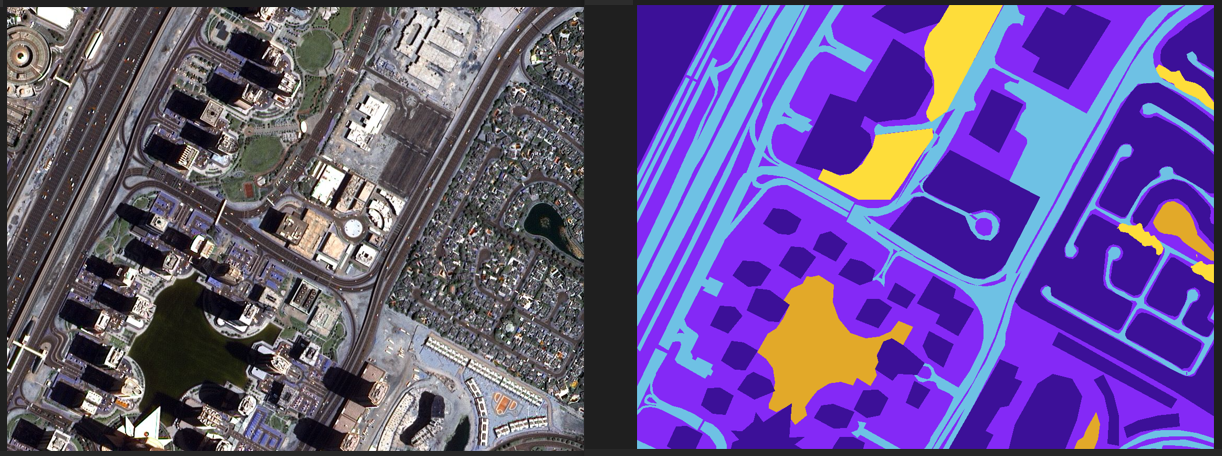
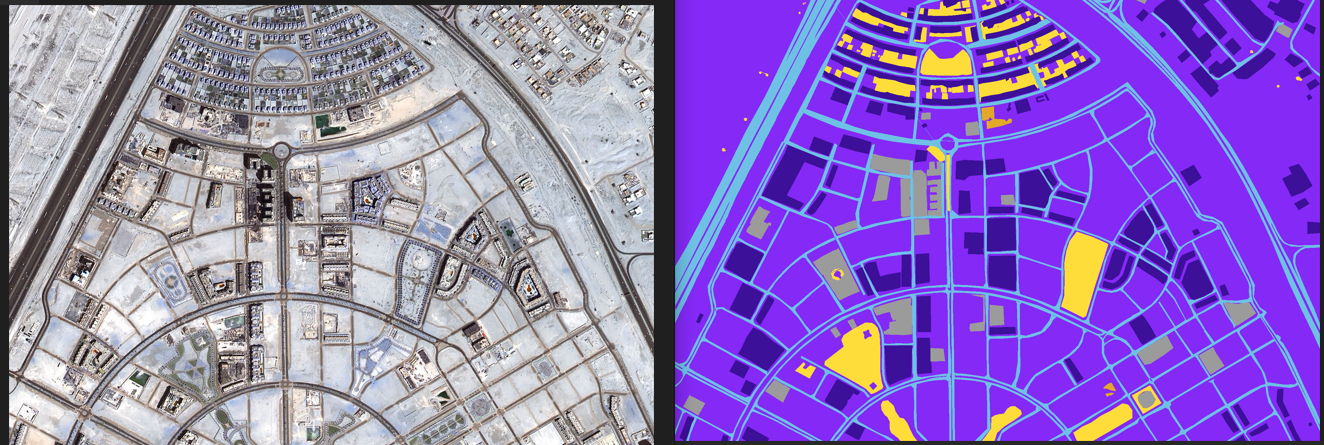

In [28]:
import os
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
dataset_root_folder='dataset/'
dataset_name='dubai_dataset'

In [46]:
minmaxscalar=MinMaxScaler()

In [5]:
for path, subdir, files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
    dir_name=path.split(os.path.sep)[-1]
    # print(dir_name)
    if dir_name == 'masks':
        images=os.listdir(path)
        # print(images)
        print(path)
        for i,image_name in enumerate(images):
            if (image_name.endswith('.png')): # mask image
                a=True
                # print(image_name)
    

dataset/dubai_dataset\Tile 1\masks
dataset/dubai_dataset\Tile 2\masks
dataset/dubai_dataset\Tile 3\masks
dataset/dubai_dataset\Tile 4\masks
dataset/dubai_dataset\Tile 5\masks
dataset/dubai_dataset\Tile 6\masks
dataset/dubai_dataset\Tile 7\masks
dataset/dubai_dataset\Tile 8\masks


In [36]:
# define patch size
image_patch_size=256

In [37]:
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [38]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [39]:
image_patches.shape

(2, 1, 1, 256, 256, 3)

In [45]:
imagex=image_patches[0,0,:,:]

imagey=minmaxscalar.fit_transform(imagex.reshape(-1,imagex.shape[-1])).reshape(imagex.shape)
imagey[0].shape

(256, 256, 3)

In [12]:
print(type(image))

<class 'numpy.ndarray'>


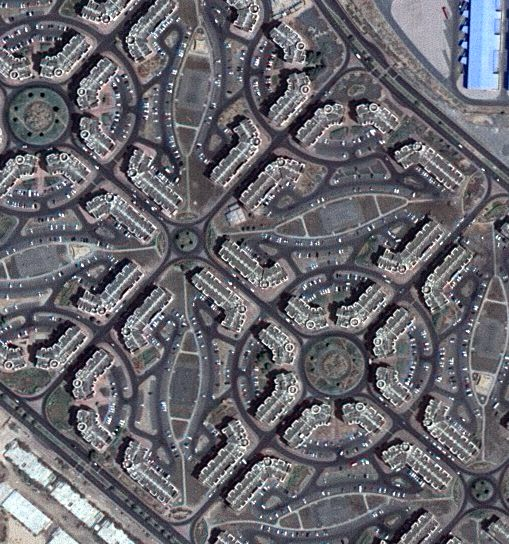

In [13]:
Image.fromarray(image)

In [8]:
(image.shape[0]//image_patch_size)*image_patch_size

512

# each image is of different shape

In [54]:
image_dataset=[]
mask_dataset=[]
 #png #jpg
for image_type in ['images','masks']:    #masks #images
    if image_type=='images':
        image_extension='jpg'
    elif image_type=='masks':
        image_extension='png'
for tile_id in range(1,8):
    for image_id in range(1,20):
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
        if image is not None:
            # print(image.shape)
            size_x=(image.shape[1]//image_patch_size)*image_patch_size
            size_y=(image.shape[0]//image_patch_size)*image_patch_size
            # print('{}----{}-{}'.format(image.shape,size_x,size_y)) # multiples of 256
            image=Image.fromarray(image)
            image=image.crop((0,0,size_x,size_y))
            # print(f'{image.size[0]},{image.size[1]}')
            image=np.array(image)
            patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
            # print(patched_images.shape)
            #get individual patched image
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image=patched_images[i,j,:,:]
                    # print(individual_patched_image.shape)
                    individual_patched_image=minmaxscalar.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    individual_patched_image=individual_patched_image[0]
                    # print(individual_patched_image.shape)
                    if image_type == 'images':
                        image_dataset.append(individual_patched_image)
                    elif image_type == 'masks':
                        mask_dataset.append(individual_patched_image)

In [51]:
len(image_dataset)

945

# processing for satellite Imagery 